## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sms

## Data Preprocessing

### Training Image Preprocessing

### Explanation of Parameters

1. **train**  
   Path to the folder containing all training images. TensorFlow will look inside each subfolder.

2. **labels="inferred"**  
   Labels are automatically created from folder names.  

3. **label_mode="categorical"**  
   

4. **batch_size=32**  
   Loads 32 images at a time for faster training.

5. **image_size=(128, 128)**  
   All images are resized to **128 × 128**.

6. **color_mode="rgb"**  
   Images are converted into 3-channel RGB format.

7. **shuffle=True**  
   Randomizes the images to avoid model bias.

8. **Outputs**  
   Returns a **TensorFlow Dataset** object ready for model training.


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    format="tf",
    verbose=True,
)


Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    format="tf",
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

### To avoid Overshooting
1. Choose small learning rate default 0.001 tae it as 0.0001
2. There maybe a chance of underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images

## Building Model

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

### Buiding Convolution Layer

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\kiran\anaconda3\envs\plantml\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64,kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=128,kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=256,kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25)) #to avoid overfitting

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500, activation='relu'))

In [15]:
model.add(Dropout(0.4))

#### units= neurons 1024-1500

In [16]:
#Output layer
model.add(Dense(units=38, activation='softmax'))

## Compiling Model

###### model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1888s 856ms/step - accuracy: 0.6095 - loss: 1.3223 - val_accuracy: 0.8538 - val_loss: 0.4778
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1682s 765ms/step - accuracy: 0.8610 - loss: 0.4360 - val_accuracy: 0.8929 - val_loss: 0.3275
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2869s 1s/step - accuracy: 0.9171 - loss: 0.2603 - val_accuracy: 0.9178 - val_loss: 0.2526
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5529s 3s/step - accuracy: 0.9416 - loss: 0.1784 - val_accuracy: 0.9327 - val_loss: 0.2093
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4805s 2s/step - accuracy: 0.9572 - loss: 0.1295 - val_accuracy: 0.9463 - val_loss: 0.1736
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3820s 2s/step - accuracy: 0.9668 - loss: 0.1023 - val_accuracy: 0.9483 - val_loss: 0.1737
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4486s 2s/step - accuracy: 0.9725 - loss: 0.0870 - val_accuracy: 0.9611 - val_loss: 0.1199
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4711s 2s/step - accuracy: 0.

In [20]:
#model.save("plant_disease_model.keras")

###### so generally the above models goes through over shooting in the loss function , where it does not reduce, not being able to minimize it
###### can be because of high learning rate


## Model Evaluation

In [ ]:
# Model Evaluation on Training set
train_loss,train_acc=model.evaluate(training_set)

In [ ]:
print(train_loss,train_acc)

In [ ]:
#Model on Validation set
val_loss,val_acc=model.evaluate(validation_set)

In [ ]:
print(val_loss,val_acc)

### Saving model

In [26]:
model.save("trained_model.h5")
model.save("trained_model.keras")

In [19]:
#re loading model
from tensorflow.keras.models import load_model
model = load_model("trained_model.h5")

In [ ]:
training_history.history

In [28]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [20]:
import json
#reloading
with open("training_hist.json", "r") as f:
    history = json.load(f)

### Accuracy Visualization 

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Results")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [21]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [22]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    format="tf",
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [23]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 268s 486ms/step


(array([[9.9999881e-01, 6.2497909e-09, 4.4898387e-11, ..., 2.8042987e-15,
         3.4882511e-14, 5.9112161e-13],
        [9.9999321e-01, 2.7221279e-08, 2.1204876e-09, ..., 9.4251668e-13,
         3.7474322e-11, 9.5931926e-12],
        [1.0000000e+00, 1.6219650e-12, 5.0149332e-13, ..., 3.1206477e-19,
         2.7368010e-16, 4.6939334e-14],
        ...,
        [1.1221663e-08, 1.8329928e-10, 9.5373743e-08, ..., 3.9094183e-10,
         6.3478132e-11, 9.9999428e-01],
        [1.5143406e-11, 1.0671368e-12, 8.6159427e-11, ..., 1.4260952e-12,
         1.2849094e-12, 1.0000000e+00],
        [3.1024634e-19, 6.5717246e-19, 4.1652284e-19, ..., 3.7367460e-21,
         1.1623931e-18, 1.0000000e+00]], shape=(17572, 38), dtype=float32),
 (17572, 38))

In [24]:
#The trained model is used to predict output values for the given test data
#y_pred= Stores the predicted results (model’s output)
#y_pred.shape= Shows the size / dimensions of the predictions array

In [25]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], shape=(17572,))>

In [26]:
#converts probability output → class label by selecting the index of highest probability for each sample.

In [27]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(17572, 38), dtype=float32)>

In [28]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], shape=(17572,))>

In [29]:
from sklearn.metrics import classification_report
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [30]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.92      0.99      0.96       502
                               Blueberry___healthy       0.99      0.92      0.95       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[490,   0,   0, ...,   0,   0,   0],
       [  0, 488,   0, ...,   0,   0,   0],
       [  1,   0, 429, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   1, ...,   0,   0, 478]], shape=(38, 38))

### Confusion Matrix Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

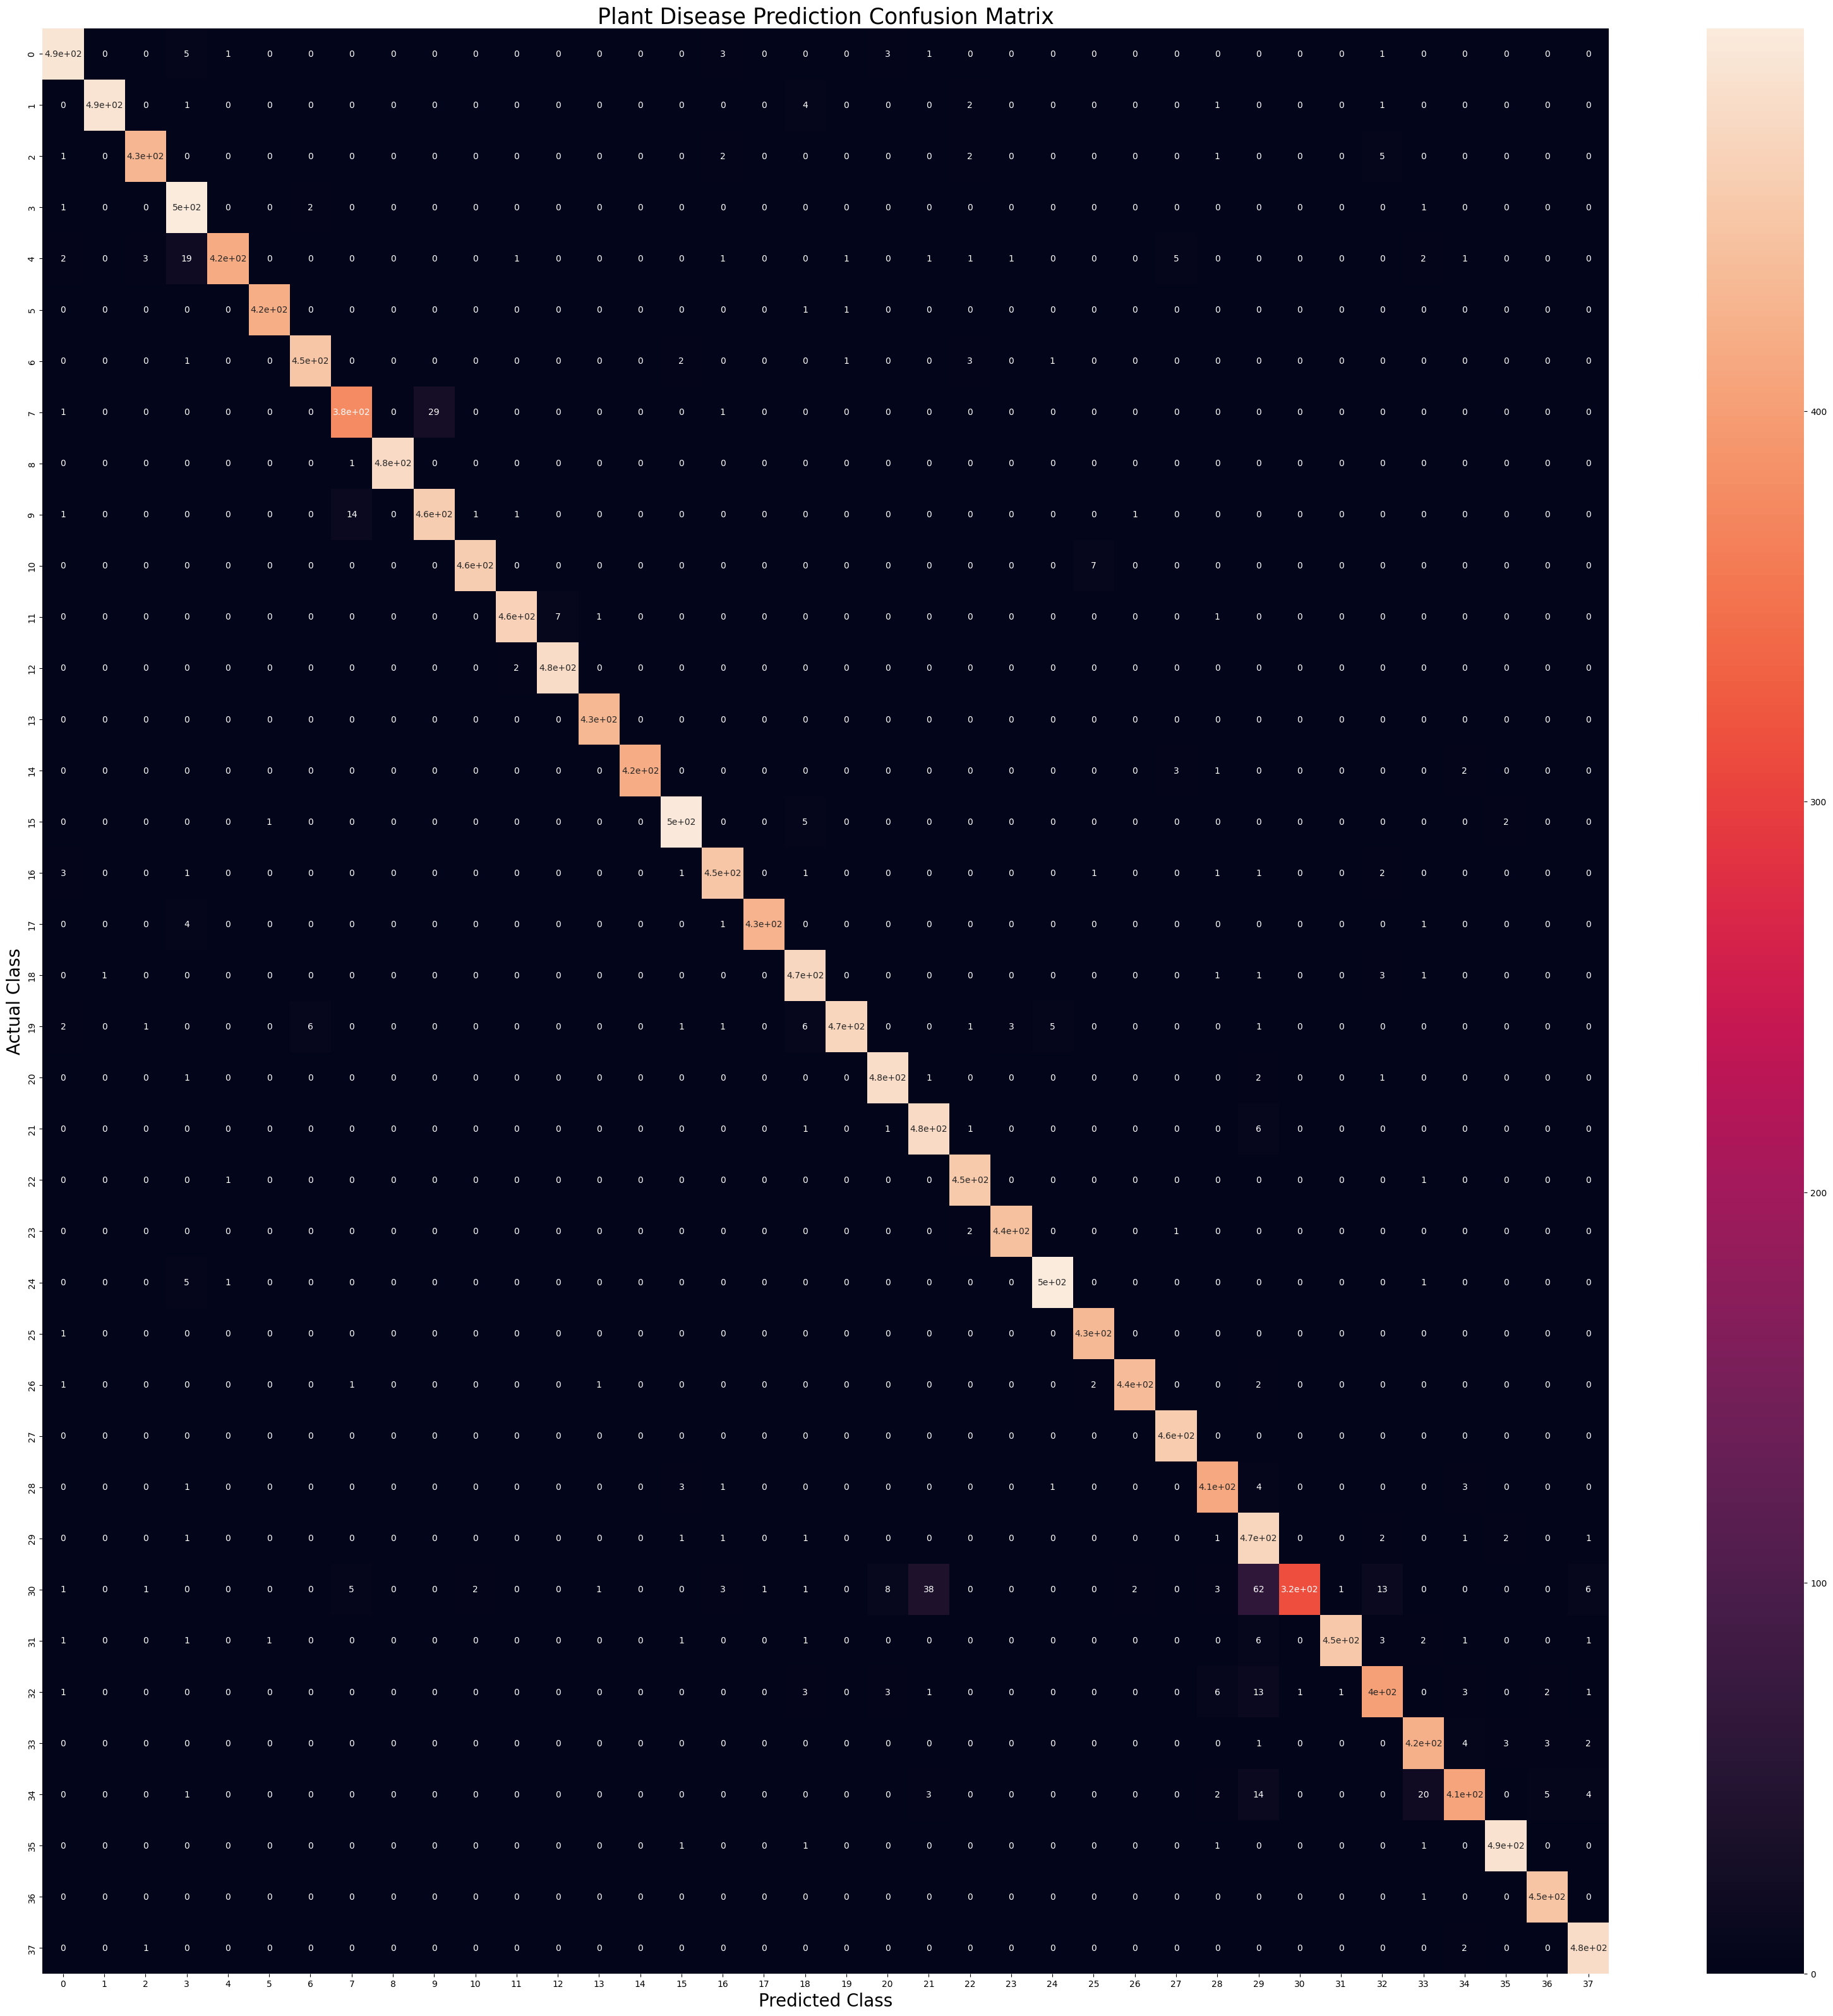

In [32]:
import seaborn as sns
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show